<a href="https://colab.research.google.com/github/warlike-owl-imp/github-slideshow/blob/master/INF1340_Final_Assignment_(G15)_Crop_Yield_%26_Climate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Canadian Crop Yield & Climate Analysis

**INF1340**

**Sheldon Chen, Lo Humeniuk, Bejamin Kelly, Will Power-Jenkins**

**December 13, 2021**



*Our project involves looking at Canadian agricultural data and comparing annual crop-yield information with yearly climate data (specifically temperature and precipitation). We will be inputting data found from Statistics Canada and Climate Change Canada, and creating a program to both visualize this data and explore correlations between yields and climate. Initial input will take the form of a .csv file but if there is time and desire for more complexity we will be exploring data-scraping techniques in order to keep information up to date and automatic. Ideally, the user will have the option to filter data by year, by crop, and by province, and produce some basic linear regression results based on the data-views selected. Other variables will be included if there is time, as well as the ability to compute some basic forecasting trends based on historical data.*


## Reading the Dataset

In [ ]:
!pip3 install stats-can #Install the Statistics Canada API
import pandas as pd
import numpy as np

     |████████████████████████████████| 4.3 MB 5.5 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
from stats_can import StatsCan #Import StatsCan library
sc = StatsCan()
#Convert crop yield data table into pandas dataframe:
crop_yield = sc.table_to_df("32-10-0359-01")



32100359-eng.zip: 100%|██████████| 4.94M/4.94M [00:00<00:00, 5.35MB/s]


In [ ]:
crop_yield.to_csv("crop_yield.csv", index=False)

In [ ]:
from stats_can import StatsCan #Import StatsCan library
sc = StatsCan()
#Convert crop yield data table into pandas dataframe:
crop_yield = sc.table_to_df("32-10-0359-01")

#Improve header readability:
crop_yield.columns = [c.replace(' ', '_') for c in crop_yield.columns]

#Drop unnecessary columns from crop yield table
crop_yield = crop_yield.drop(columns=["DGUID"])
crop_yield = crop_yield.drop(crop_yield.loc[:,"UOM_ID":"COORDINATE"] \
                             .columns, axis = 1)
crop_yield = crop_yield.drop(crop_yield.loc[:,"STATUS":"DECIMALS"] \
                             .columns, axis = 1)
crop_yield = crop_yield.dropna()

#Reset index based on new number of rows
crop_yield.reset_index(inplace=True)
crop_yield = crop_yield.drop("index", 1)

In [ ]:
def redo_columns(df):
#Find averages for provinces that have more than one weather station;
#amalgamate these averages into new columns named for provinces and
#discard remaining columns

#Means of multiple weather stations:
  df['Alberta'] = df[['CALGARY', 'EDMONTON']].mean(axis=1)
  df['Quebec'] = df[['MONTREAL', 'QUEBEC']].mean(axis=1)
  df['Ontario'] = df[['OTTAWA', 'TORONTO']].mean(axis=1)
   #Dict to replace weather station names with provinces:
  new_columns = {'MONCTON': 'New Brunswick',
        'SASKATOON': 'Saskatchewan',
        'STJOHNS': 'Newfoundland and Labrador',
        'VANCOUVER': 'British Columbia',
        'WINNIPEG': 'Manitoba',
        'HALIFAX': 'Nova Scotia',
        'CHARLOTTETOWN': 'Prince Edward Island'}

  df.rename(columns=new_columns,
          inplace=True)

#Remove columns that provided means
  df.drop(['CALGARY','EDMONTON','MONTREAL','OTTAWA','QUEBEC', \
           'TORONTO','WHITEHORSE'], axis = 1,inplace=True)
  return df


In [ ]:
##CODE FOR MANIPULATING PRECIPITATION DATA from PEI
# Not needed for code to run, just showing some work
# Similar code was created for temperature data

#precip = pd.read_csv('/content/drive/MyDrive/1340 Project/Data/precipitation \
#data/Canadian_precipitation_2.csv')
#print(precip)

#Rename columns
#precip.columns = [p.replace('TOTAL_PRECIPITATION_', '') \
#for p in precip.columns]

#precip= redo_columns(precip)
#precip.dtypes

#Find annual sums of precipitation from dataset
#Yearly_precip = precip_data.groupby(["LOCAL_DATE"]).sum()

#print(Yearly_precip)

#Import Charlottetown data up to 2012 because it was missing
#from other dataset -- note monthly data only exists in this
#new set up to 2012
#pei_precip_data_2012 = pd.read_csv('/content/drive/MyDrive/1340 Project \
#/Data/en_climate_monthly_PE_8300300_1943-2012_P1M.csv')

#Find annual sums of precipitation from Charlottetown data up to 2012
#pei_Yearly_precip = pei_precip_data_2012.groupby(["Year"]).sum()

#Import amangamated data from Charlottetown from 2013 to 2019
#pei_precip_data_2013 = pd.read_csv('/content/drive/MyDrive/1340 Project \
#/Data/pei_2013.csv')
#Change indexing so that the columns will match
#pei_precip_data_2013.set_index('YEAR', inplace = True)

#Combine all of the Charlottetown data
#pei_full_precip = (pei_Yearly_precip.append(pei_precip_data_2013) \
#['Total Precip (mm)'])
#print(pei_full_precip)

#Combine Charlottetown data with earlier precipitation dataset that
#includes all other provinces
#fullset_precip = Yearly_precip.join(other=pei_full_precip)

#Rename column
#fullset_precip.rename(columns = {'Total Precip \
#(mm)':'Prince Edward Island'})

#export_csv = fullset_precip.to_csv (r'/content/drive/MyDrive/1340 Project \
#/Data/precipitation_data_updated.csv', index = None, header=True)


#Provincial precipitation

In [ ]:
#Read in broad temperature data (all and PEI)

temp = pd.read_csv('https://raw.githubusercontent.com/BenKelly-Data/Canadian-Agricutural-Yields-vs-Climate/main/temperature_data.csv')
pei_temp_2012 = pd.read_csv('https://raw.githubusercontent.com/BenKelly-Data/ \
Canadian-Agricutural-Yields-vs-Climate/main/en_climate_monthly_PE_8300300_1943-2012_P1M.csv')
pei_Yearly_temp = pei_temp_2012.groupby(["Year"]).mean() #Mean data by year
pei_temp_data_2013 = pd.read_csv('https://raw.githubusercontent.com/BenKelly-Data/ \
Canadian-Agricutural-Yields-vs-Climate/main/pei_2013.csv')
pei_temp_data_2013.set_index('YEAR', inplace = True)

#Select only temp data from PEI data
pei_temp_data_2013 = pei_temp_data_2013[['Mean Temp (°C)']]
pei_Yearly_temp = pei_Yearly_temp[['Mean Temp (°C)']]
#Append 2013-2019 data to 90's-2012 data:
pei_temp=pei_Yearly_temp.append(pei_temp_data_2013)
#Match indexes between:
pei_temp['YEAR'] = pei_temp.index
temp.set_index('YEAR')

#Join PEI data to the rest of the provinces
temp=temp.join(pei_temp.set_index('YEAR'),on='YEAR',how='left')

#Match formating between columns and with precipitation data
temp.rename(columns={'Mean Temp (°C)':'MEAN_TEMPERATURE_CHARLOTTETOWN'}, \
            inplace=True)
temp.columns = [t.replace('MEAN_TEMPERATURE_', '') for t in temp.columns]

temp = redo_columns(temp)



InvalidURL: ignored

In [ ]:
#GitHub Precip Data
precip = pd.read_csv('https://raw.githubusercontent.com/BenKelly-Data/ \
Canadian-Agricutural-Yields-vs-Climate/main/precipitation_data_updated.csv')
precip.rename(columns={'Total Precip (mm)':'TOTAL_PRECIPITATION_CHARLOTTETOWN'}, \
              inplace=True)
precip.columns = [p.replace('TOTAL_PRECIPITATION_', '') for p in precip.columns]

precip= redo_columns(precip)
precip['YEAR'] = temp['YEAR'] #Re-add year data

precip.drop(precip.tail(1).index,inplace=True) #Remove extra error row
precip['YEAR'] = precip['YEAR'].astype(int)


## Data Cleaning

In [ ]:
#FOCUSSING ON PROVINCIAL DATA
provs = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
         'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
         'Quebec', 'Saskatchewan','Prince Edward Island']

#Subset crop data to just provincial data (not national or regional):
prov_ag = crop_yield[crop_yield['GEO'].isin(provs)]

#Change year to be a string:
prov_ag[["REF_DATE"]]=prov_ag[["REF_DATE"]].astype(str)

prov_ag=prov_ag.rename(columns = {'REF_DATE':'YEAR'})

prov_ag = prov_ag.replace({'-01-01': ''}, regex=True)
prov_ag[["YEAR"]]=prov_ag[["YEAR"]].astype(int)
prov_ag = prov_ag[prov_ag.YEAR >= 1940]
prov_ag = prov_ag[prov_ag.YEAR <= 2019]
prov_ag = prov_ag.reset_index()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
precip

,Nova Scotia,New Brunswick,Saskatchewan,Newfoundland and Labrador,British Columbia,Manitoba,Prince Edward Island,Alberta,Quebec,Ontario,YEAR
0,0.0,1016.9,353.1,0.0,1074.4,435.5,NaN,228.35,0.000,823.30,1940
1,0.0,1189.1,258.0,0.0,1107.5,625.4,NaN,196.05,163.400,712.00,1941
2,0.0,986.4,472.0,1466.2,811.1,562.9,NaN,261.25,505.200,938.00,1942
3,0.0,1217.8,313.4,1805.4,794.6,504.8,945.1,168.15,1029.350,847.15,1943
4,0.0,1063.5,338.4,1945.0,835.5,618.3,1106.0,216.45,858.450,731.05,1944
...,...,...,...,...,...,...,...,...,...,...,...
75,1538.1,0.0,0.0,1176.8,1141.6,647.9,1387.3,400.60,1095.875,706.85,2015
76,1508.6,0.0,0.0,1428.6,1321.0,614.9,1073.4,508.30,1134.850,713.40,2016
77,1537.3,0.0,0.0,1268.9,1234.3,406.6,1060.3,435.10,1157.125,1097.40,2017
78,1601.1,0.0,0.0,1251.8,1343.4,406.2,1202.3,443.65,1066.350,939.20,2018


In [ ]:
def inTemp(row):
  t=prov_ag.iloc[[row.name]] #Get row index of current row
  y=t['YEAR'] #Find the year associated with the row
  y=int(y) #Ensure it's an integer

#Get province as string (redundancy needed):
  p=t['GEO'].astype("string").to_string()
  head, sep, p = p.partition('  ')
  p=p.lstrip()
  test=temp.loc[temp['YEAR'] == y]
  v=test[p]
  return float(v)

def inPrecip(row):
  t=prov_ag.iloc[[row.name]]
  y=t['YEAR']
  y=int(y)

  p=t['GEO'].astype("string").to_string()
  head, sep, p = p.partition('  ')
  p=p.lstrip()
  test=precip.loc[precip['YEAR'] == y]
  v=test[p]
  return float(v)

In [ ]:
#TAKES 3 MIN
#Add temperature column to crop yield data
prov_ag["TEMP"]=''
prov_ag["TEMP"]=prov_ag.apply(inTemp, axis=1)

In [ ]:
#Add precipitation column to crop yield data
prov_ag["PRECIP"]=''
prov_ag["PRECIP"]=prov_ag.apply(inPrecip, axis=1)



```
# This is formatted as code
```

## GUI Creation & MatPlotLib Integration

In [ ]:
from tkinter import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tkinter.messagebox

#won't need this part once StatsCan gets back up and running:
#crop_yield = pd.read_csv("dat.csv")

crop_yield = prov_ag

# Generates the values for the drop down menus and sorts the lists for
#easier readability
province_list = sorted(crop_yield["GEO"].unique())
crop_list = sorted(crop_yield["Type_of_crop"].unique())
prov_ag = crop_yield

# Error message generation for bad values (mostly in Newfoundland set)
def expected_vector():
  tkinter.messagebox.showerror("TypeError", \
                               "Expected non-empty vector for x: \nData has no value \
                               for province and crop selected")


class Graph:
  def __init__(self, Prov, CropTp, TempORPrecip):
    self.Prov = Prov
    self.CropTp = CropTp
    self.TempORPrecip = TempORPrecip
    self.__setData__()
    self.__display__()

  def __setData__(self):
    self.X = (prov_ag[(prov_ag.GEO == self.Prov) &
                   (prov_ag.Type_of_crop == self.CropTp)
                 & (prov_ag.Harvest_disposition ==
                    'Average yield (kilograms per hectare)')
                ].dropna()["YEAR"]).values
    self.production = (prov_ag[(prov_ag.GEO == self.Prov) &
                   (prov_ag.Type_of_crop == self.CropTp)
                 & (prov_ag.Harvest_disposition ==
                    'Average yield (kilograms per hectare)')
                ].dropna()["VALUE"]).values
    if self.TempORPrecip == 'TEMP':
      self.key = 'TEMP'
    else:
      self.key = 'PRECIP'
    self.independentVAR = (prov_ag[(prov_ag.GEO == self.Prov) &
                   (prov_ag.Type_of_crop == self.CropTp)
                 & (prov_ag.Harvest_disposition ==
                    'Average yield (kilograms per hectare)')
                ].dropna()[self.key]).values

  def __display__(self):

    self.max_temp =  max((prov_ag["TEMP"].dropna()).values)
    self.min_temp =  min((prov_ag["TEMP"].dropna()).values)
    self.max_precip =  max((prov_ag["PRECIP"].dropna()).values)
    self.max_yield = max((prov_ag[(prov_ag.Type_of_crop == self.CropTp) &
                        (prov_ag.Harvest_disposition ==
                         'Average yield (kilograms per hectare)')]["VALUE"]
                .dropna()).values)

    try:
      fig, ax1 = plt.subplots()

      ax2 = ax1.twinx()
      ax1.plot(self.X, self.production, 'o', color = 'lightcoral',
              label = 'Average Yield')
      ax1.set_ylim(0,1000 + self.max_yield)
      ax1.set_xlabel('Year')
      ax1.set_ylabel('kilograms per hectare')

      if self.key == 'TEMP':
        ax2.plot(self.X, self.independentVAR, 'o', color = 'peachpuff',
              label = 'Temperature')
        ax2.set_ylim(self.min_temp-2, self.max_temp+2)
        ax2.set_ylabel('Celsius')
      else:
        ax2.plot(self.X, self.independentVAR, 'o', color = 'lightblue',
              label = 'Precipitation')
        ax2.set_ylim(0, self.max_precip+2)
        ax2.set_ylabel('100mm')

      fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

      m, b = np.polyfit(self.X, self.production, 1)
      m1, b1 = np.polyfit(self.X, self.independentVAR, 1)

      ax1.plot(self.X, m*self.X+b, color='lightcoral')
      if self.key == "TEMP":
        ax2.plot(self.X, m1*self.X+b1, color='peachpuff')
      else:
        ax2.plot(self.X, m1*self.X+b1, color='lightblue')

      if self.key == "TEMP":
          climate1 = "Temperature"
      else:
          climate1 = "Precipitation"

      plt.title("Relationship between {} and Crop Yield \
      ({}) \nin {} from 1940 to Present".format(climate1, self.CropTp, self.Prov))

      plt.show()
    except TypeError:
      expected_vector()

# Class for the main GUI - presents the user with options to select province,
#crop type, and climate type to generate a plot, as well as
#to exit the application
class MainGUI:
    def __display__(self):
        Graph()

    def __init__(self, master):
        self.master = master
        Frame1 = Frame(self.master)
        Frame1.grid()

        # Brief set of instructions
        self.prompt = Message(master, text="Choose a province, a type of crop, \
        and one of temperature or precipitation to see the relationship.", \
        fg = "white", bg = def_back, width = 400, justify="center")
        self.prompt.configure(font=("arial", 9, "bold"), borderwidth = 1, \
                              relief = GROOVE)
        self.prompt.grid(row = 1, column = 1, pady = 15, padx = 5, columnspan = 2)

        # Creates dropdown menu for provinces
        self.Province = StringVar()
        self.Province.set("Alberta")
        self.ProvinceSelect = OptionMenu(master, self.Province, *province_list, \
                                         command = lambda _: self.getProvince())
        self.ProvinceSelect.grid(row = 2, column = 2, pady = 5, padx = 5)
        self.ProvinceSelect["highlightthickness"]=0
        self.ProvinceSelect.config(bg = "Slategray3")
        self.ProvLabel = Label(master, text = "Select a province:", \
                               fg = "white", bg = def_back,)
        self.ProvLabel.grid(row = 2, column = 1, padx = 5)

        # Creates drop down menu for crop types
        self.CropType = StringVar()
        self.CropType.set("Barley")
        self.CropSelect = OptionMenu(master, self.CropType, *crop_list, \
                                     command = lambda _: self.getCrop())
        self.CropSelect.grid(row = 3, column = 2, pady = 5, padx = 5)
        self.CropSelect["highlightthickness"]=0
        self.CropSelect.config(bg = "Slategray3")
        self.CropLabel = Label(master, text = "Select a crop:", \
                               fg = "white", bg = def_back,)
        self.CropLabel.grid(row = 3, column = 1, padx = 5)

        # Creates drop down menu for climate type
        self.ClimateType = StringVar()
        self.ClimateType.set("TEMP")
        self.ClimateSelect = OptionMenu(master, self.ClimateType, \
                                        "TEMP", "PRECIP", command = lambda _: self.getClimate())
        self.ClimateSelect.grid(row = 4, column = 2, pady = 5, padx = 5)
        self.ClimateSelect.config(bg = "Slategray3")
        self.ClimateSelect["highlightthickness"]=0
        self.ClimateLabel = Label(master, text = "Temperature or Precipitation:", \
                                  fg = "white", bg = def_back,)
        self.ClimateLabel.grid(row = 4, column = 1, padx = 5)

        self.interact()

    def interact(self):

        #First button calls the Graph class functions and plots the data
        #based on user input from the drop down menus
        self.button_1 = Button(self.master , text = "Plot", command = lambda : \
                               Graph(self.Province.get(), self.CropType.get(), self.ClimateType.get()), \
                               bg="papayawhip")
        self.button_1.grid(row = 5, column = 2, pady = 10, padx = 5)  ##plot

        # Button that calls the _quit function to exit the program
        self.button_2 = Button(self.master , text = "Quit", \
                               command = self._quit, bg = "salmon")
        self.button_2.grid(row = 6, column = 2, pady = 10, padx = 5)

    # Destroys the mainloop instance
    def _quit(self):
        window.quit()
        window.destroy()

    # The 3 functions below store the option selected via the drop down menus
    #as a value to be worked with
    # If no option is selected, the default values of "Alberta", "Barley",
    #and "TEMP" will be used
    def getProvince(self):
        global Province
        ProvinceGet = self.Province.get()

    def getCrop(self):
        global CropGet
        CropGet = self.CropType.get()

    def getClimate(self):
        global ClimateGet
        ClimateGet = self.ClimateType.get()

# calls the GUI and creates an instance
if __name__ == '__main__':

    window = Tk()
    window.title("Canadian Crop Yield Analysis")
    window.configure(bg = "SkyBlue4")

    def_back = "SkyBlue4"

    app1_inst = MainGUI(window)

    window.mainloop()

TclError: ignored

## Linear Regression Analysis

In [ ]:
!pip install sklearn
!pip install numpy
!pip install matplotlib
!pip install statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#prov_ag = pd.read_csv('/content/drive/MyDrive/1340 Project/dat.csv')
prov_ag

,index,YEAR,GEO,Harvest_disposition,Type_of_crop,UOM,VALUE,TEMP,PRECIP
0,39384,1940,Prince Edward Island,Seeded area (acres),Barley,Acres,13000.0,NaN,NaN
1,39385,1940,Prince Edward Island,Seeded area (acres),Buckwheat,Acres,3700.0,NaN,NaN
2,39386,1940,Prince Edward Island,Seeded area (acres),Corn for silage,Acres,400.0,NaN,NaN
3,39387,1940,Prince Edward Island,Seeded area (acres),Mixed grains,Acres,43000.0,NaN,NaN
4,39388,1940,Prince Edward Island,Seeded area (acres),Oats,Acres,142800.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
100493,183525,2019,British Columbia,Production (metric tonnes),"Wheat, all excluding durum wheat",Metric tonnes,111200.0,10.350552,965.7
100494,183526,2019,British Columbia,Production (hundredweight),"Beans, all dry (white and coloured)",Hundredweight,0.0,10.350552,965.7
100495,183527,2019,British Columbia,Production (hundredweight),"Beans, dry white",Hundredweight,0.0,10.350552,965.7
100496,183528,2019,British Columbia,Production (hundredweight),"Beans, dry coloured",Hundredweight,0.0,10.350552,965.7


In [ ]:
#Step 1: Testing the existence of a linear relationship between climate change
#and agricultural crop yield in Canada

#Declare Global Constants to be used as queries
DEFAULT_YEAR = 2018
DEFAULT_CROP = 'Barley'
SIGNIFICANCE_LEVEL = 0.05

#class to summarize if there is a linear correlation
#between each pair of (temp, precip) (yield) variables

class LinearValidate:
  '''
  Return a dataframe summarizing the existence of a linear correlation
  between each pair of (temp, precip) (crop_type) variables in each province.
  Each row of this returned data frame has three columns 'Province_name',
  'Crop_name', 'Existence_of_linear_relation'

  Example output:
  Province_name   Crop_name   Existence_of_linear_relation
  Alberta         Barley      No
  Alberta         ...         ...
  ...             ...         ...
  ...             ...         ...
  Saskachewan     Wheat       No
  '''

  #initialize class variables to store a list of all provinces, a list of
  #crops grown in a province and a list of results documenting the applicability
  #of a linear model
  def __init__(self):
    self.Harvest_disposition = 'Average yield (kilograms per hectare)'
    self.ProvLst = prov_ag[(prov_ag.YEAR	== 2018) &
                           (prov_ag.Type_of_crop.str.contains(DEFAULT_CROP)) &
               (prov_ag.Harvest_disposition == self.Harvest_disposition)].GEO.values
    self.ProvRecord = []
    self.CropRecord = []
    self.FTestRecord = []
    self.validate(prov_ag)

  # return all the crop types grown in a particular province
  def ProvCropType(self, Df_ag, Prov):
    return prov_ag[(prov_ag.GEO == Prov) & (prov_ag.YEAR	== DEFAULT_YEAR) &
                   (prov_ag.Harvest_disposition == self.Harvest_disposition)]. \
                   Type_of_crop.values

  # genearte a third column indicating the applicability of a linear model to
  # summarize the relation between crop yield and
  #(temperature change/ precipitation change)
  def validate(self, Df_ag):
    for ProvName in self.ProvLst:
      ThisProvCrop = self.ProvCropType(Df_ag, ProvName)
      for CropName in ThisProvCrop:
        #do a f test to validate  a linear model's fit
        # for this crop's data in 80 years

        #extract the 80-year historical data for ThisProvCrop
        ThisCropDf = prov_ag[(prov_ag.GEO == ProvName) &
                   (prov_ag.Type_of_crop == CropName)
                 & (prov_ag.Harvest_disposition == self.Harvest_disposition)
                ].dropna()

        # Extract dependent variables y and the independent variables X
        X = ThisCropDf.loc[:, ['TEMP', 'PRECIP']].values
        y = ThisCropDf.loc[:, ['VALUE']].values

        if (len(X) == len(y)) and (len(X) != 0):
        #fit a linear model with (X, y)
          X = sm.add_constant(X)
          model = sm.OLS(y, X).fit()

          #print(model.pvalues)

        #running a f-test for the validity of this model
          if (model.pvalues[0] < SIGNIFICANCE_LEVEL) and \
          (model.pvalues[1] < SIGNIFICANCE_LEVEL) and \
          (model.pvalues[2] < SIGNIFICANCE_LEVEL):
            f_test = 'Yes'
          else:
            f_test = 'No'

        #push the result of the f test onto self.record
        self.ProvRecord.append(ProvName)
        self.CropRecord.append(CropName)
        self.FTestRecord.append(f_test)

    #after the iteration, create the new dataframe
    LinearRegressionTest = {'Province_name': self.ProvRecord,
                'Crop_name': self.CropRecord,
                'Existence_of_linear_relation':
                self.FTestRecord}

    self.result =  pd.DataFrame(LinearRegressionTest, columns = ['Province_name'
    , 'Crop_name', 'Existence_of_linear_relation'])

  def __print__(self):
    #display all the crops grown in each province and if
    #there is a linear relation between climate change and crop yield
    display(self.result)

  def __filter__(self):
    #display only the ones where a linear
    #correlation exists between the yield of this crop grown in
    #that province and the the change in temperature as well as
    # precipitation in the past 80 years
    self.filtered = self.result[self.result.Existence_of_linear_relation == 'Yes']
    display(self.filtered)

In [ ]:
#calling the class and show the Summary
SummaryDf = LinearValidate()
SummaryDf.__print__()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.7/dist-packag

,Province_name,Crop_name,Existence_of_linear_relation
0,Prince Edward Island,Barley,No
1,Prince Edward Island,"Beans, all dry (white and coloured)",No
2,Prince Edward Island,"Beans, dry coloured",No
3,Prince Edward Island,Corn for grain,No
4,Prince Edward Island,Corn for silage,No
...,...,...,...
216,British Columbia,"Wheat, Canada Prairie Spring Red (CPSR) and Ca...",No
217,British Columbia,"Wheat, Canada Northern Hard Red (CNHR)",No
218,British Columbia,"Wheat, other spring",No
219,British Columbia,"Wheat, winter remaining",No


In [ ]:
#extract the the crop names and province names where a linear
#correlation exists between the yield of this crop grown in
#that province and the the change in temperature as well as
# precipitation in the past 80 years
SummaryDf.__filter__()

,Province_name,Crop_name,Existence_of_linear_relation
78,Ontario,Corn for grain,Yes
90,Ontario,"Wheat, all",Yes
97,Ontario,"Wheat, winter remaining",Yes
137,Saskatchewan,Corn for silage,Yes
171,Alberta,Corn for silage,Yes


In [ ]:
#Step 2: Visualize the comparison between the
#A: trend of temperature change OR,
#B: precipitation change and yield AND,
#C: change of a particular crop species in a Canadian province
# in the past 80 years

#The class is designed based on the following assumtions:
# a user is imagined to be provided the following entry boxes/drop-down list
# A: province
# B: a valid CropName
# C: select either 'TEMP' or 'PRECIP'

#The class Graph displays the visuaization of the B and C's trend in the past 80
#years

class Graph:

  #set the inputs given by users as class variables, so that the province names
  #crop names etc can be used to create the plots
  def __init__(self, Prov, CropTp, TempORPrecip):
    self.Prov = Prov
    self.CropTp = CropTp
    self.TempORPrecip = TempORPrecip
    self.__setData__()
    self.__display__()

  # A. Extract all values which correspond to the province names, crop names,
  # temperature values or precipitation values queries by users
  # B. set the historical values of crop yield as an array of dependent variables
  # and the temp/precip values as an array of dependent variables
  def __setData__(self):
    self.X = (prov_ag[(prov_ag.GEO == self.Prov) &
                   (prov_ag.Type_of_crop == self.CropTp)
                 & (prov_ag.Harvest_disposition ==
                    'Average yield (kilograms per hectare)')
                ].dropna()["YEAR"]).values
    self.production = (prov_ag[(prov_ag.GEO == self.Prov) &
                   (prov_ag.Type_of_crop == self.CropTp)
                 & (prov_ag.Harvest_disposition ==
                    'Average yield (kilograms per hectare)')
                ].dropna()["VALUE"]).values
    if self.TempORPrecip == 'TEMP':
      self.key = 'TEMP'
    else:
      self.key = 'PRECIP'
    self.independentVAR = (prov_ag[(prov_ag.GEO == self.Prov) &
                   (prov_ag.Type_of_crop == self.CropTp)
                 & (prov_ag.Harvest_disposition ==
                    'Average yield (kilograms per hectare)')
                ].dropna()[self.key]).values

  #display the scatter plots and the linear regression lines
  # of dependent and independent variables
  def __display__(self):

    ## find maximum and minimums for setting the scale of axis displayed
    self.max_temp =  max((prov_ag["TEMP"].dropna()).values)
    self.min_temp =  min((prov_ag["TEMP"].dropna()).values)
    self.max_precip =  max((prov_ag["PRECIP"].dropna()).values)
    self.max_yield = max((prov_ag[(prov_ag.Type_of_crop == self.CropTp) &
                        (prov_ag.Harvest_disposition ==
                         'Average yield (kilograms per hectare)')]["VALUE"]
                .dropna()).values)

    # declare a subplot
    fig, ax1 = plt.subplots()

    #set the x-axis and left y-axis of the plot
    ax2 = ax1.twinx()
    ax1.plot(self.X, self.production, 'o', color = 'lightcoral',
             label = 'Average Yield')
    ax1.set_ylim(0,1000 + self.max_yield)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('kilograms per hectare')

    #set the right y-axis of the plot
    if self.key == 'TEMP':
      ax2.plot(self.X, self.independentVAR, 'o', color = 'peachpuff',
             label = 'Temperature')
      ax2.set_ylim(self.min_temp-2, self.max_temp+2)
      ax2.set_ylabel('Celsius')
    else:
      ax2.plot(self.X, self.independentVAR, 'o', color = 'lightblue',
             label = 'Precipitation')
      ax2.set_ylim(0, self.max_precip+2)
      ax2.set_ylabel('mm')

    # set and display a legend for the plot
    fig.legend(loc='upper left', bbox_to_anchor=(0.14, 0.87))

    # set and display the linear regression lines of the independent and
    # dependent variables
    m, b = np.polyfit(self.X, self.production, 1)
    m1, b1 = np.polyfit(self.X, self.independentVAR, 1)

    ax1.plot(self.X, m*self.X+b, color='lightcoral')
    if self.key == "TEMP":
      ax2.plot(self.X, m1*self.X+b1, color='peachpuff')
    else:
      ax2.plot(self.X, m1*self.X+b1, color='lightblue')

    plt.show()

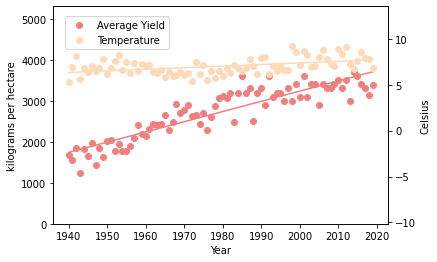

In [ ]:
# test call the graph

#The third field must be one of the two:
#Temperature or
#Precipitation

#Please note that the crop types grown in different provinces are not the same
#GUI might need an error handling section for user entering invalid inputs

Graph('Ontario', 'Barley', 'TEMP')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')